# Question Classification

## Load word2vec models

#### Load the word2vec models

In [1]:
import gensim
from gensim.models import KeyedVectors

C:\Users\Dinopc\Anaconda3\envs\venv\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
%%time
pt_w2v_patch = 'C:\word_embedding\pt_cbow_s300.txt'
pt_w2v = KeyedVectors.load_word2vec_format(pt_w2v_patch, unicode_errors="ignore")
pt_model_w2v = {w: vec for w, vec in zip(pt_w2v.index2word, pt_w2v.syn0)}
del pt_w2v

C:\Users\Dinopc\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until


Wall time: 3min 26s


In [ ]:
%%time
en_w2v_patch = 'C:\word_embedding\GoogleNews-vectors-negative300.bin'
en_w2v = gensim.models.Word2Vec.load_word2vec_format(en_w2v_patch, binary=True)
en_model_w2v = {w: vec for w, vec in zip(en_w2v.index2word, en_w2v.syn0)}
del en_w2v

## Util

#### Separete the questions in data (X) and label (y)

In [3]:
def separete_questions(questions, label_key='class'):
    X = []
    y = []
    for question in questions:
        text = question['question']
        X.append(text)
        y.append(question[label_key])
    return X, y

####  Ignore all warnings

In [4]:
import warnings
warnings.filterwarnings("ignore")

### Reload Import

In [ ]:
import importlib
importlib.reload(QCM)

## Create Models

#### SVM



In [5]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
import qc_models as QCM 

def svm_bow_model():
    return Pipeline([("vector_model", QCM.count_vectorizer(max_features=1000)), ("classifer", LinearSVC())])

def svm_tfidf_model():
    return Pipeline([("vector_model", QCM.tfidf_vectorizer(max_features=1000)), ("classifer", LinearSVC())])

def svm_w2v_model(w2v):
    return Pipeline([("vector_model", QCM.MeanEmbeddingVectorizer(w2v)), ("classifer", LinearSVC())])

def svm_hybrid_model(w2v):
    cv_ = QCM.tfidf_vectorizer(max_features=1000)
    cv_.fit(chave_X)
    cv = QCM.my_vectorizer(cv_)
    return Pipeline([("vector_model", QCM.HybridVectorizer(pt_model_w2v, cv)), ("classifer", LinearSVC())])

def svm_hybrid2_model(w2v):
    cv_ = QCM.count_vectorizer(max_features=1000)
    cv_.fit(chave_X)
    cv = QCM.my_vectorizer(cv_)
    return Pipeline([("vector_model", QCM.HybridVectorizer(pt_model_w2v, cv)), ("classifer", LinearSVC())])

#### Naive Bayes

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
import qc_models as QCM 


def nbmn_bow_model():
    cv_ = QCM.count_vectorizer(max_features=1000)
    cv_.fit(chave_X)
    cv = QCM.my_vectorizer(cv_)
    return Pipeline([("vector_model", cv), ("classifer", MultinomialNB())])

def nbmn_tfidf_model():
    cv_ = QCM.tfidf_vectorizer(max_features=1000)
    cv_.fit(chave_X)
    cv = QCM.my_vectorizer(cv_)
    return Pipeline([("vector_model", cv), ("classifer", MultinomialNB())])

def nbmn_w2v_model(w2v):
    return Pipeline([("vector_model", QCM.MeanEmbeddingVectorizer(w2v)), ("classifer", MultinomialNB())])

def nbmn_hybrid_model(w2v):
    cv_ = QCM.tfidf_vectorizer(max_features=1000)
    cv_.fit(chave_X)
    cv = QCM.my_vectorizer(cv_)
    return Pipeline([("vector_model", cv), ("classifer", MultinomialNB())])

def nbmn_hybrid2_model(w2v):
    cv_ = QCM.count_vectorizer(max_features=1000)
    cv_.fit(chave_X)
    cv = QCM.my_vectorizer(cv_)
    return Pipeline([("vector_model", cv), ("classifer", MultinomialNB())])




def nbbl_bow_model():
    cv_ = QCM.count_vectorizer(max_features=1000)
    cv_.fit(chave_X)
    cv = QCM.my_vectorizer(cv_)
    return Pipeline([("vector_model", cv), ("classifer", BernoulliNB())])

def nbbl_tfidf_model():
    cv_ = QCM.tfidf_vectorizer(max_features=1000)
    cv_.fit(chave_X)
    cv = QCM.my_vectorizer(cv_)
    return Pipeline([("vector_model", cv), ("classifer", BernoulliNB())])

def nbbl_w2v_model(w2v):
    return Pipeline([("vector_model", QCM.MeanEmbeddingVectorizer(w2v)), ("classifer", BernoulliNB())])

def nbbl_hybrid_model(w2v):
    cv_ = QCM.tfidf_vectorizer(max_features=1000)
    cv_.fit(chave_X)
    cv = QCM.my_vectorizer(cv_)
    return Pipeline([("vector_model", QCM.HybridVectorizer(pt_model_w2v, cv)), ("classifer", BernoulliNB())])

def nbbl_hybrid2_model(w2v):
    cv_ = QCM.count_vectorizer(max_features=1000)
    cv_.fit(chave_X)
    cv = QCM.my_vectorizer(cv_)
    return Pipeline([("vector_model", QCM.HybridVectorizer(pt_model_w2v, cv)), ("classifer", BernoulliNB())])

#### MLP

In [5]:
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import qc_models as QCM 


def mlp_bow_model_():
    model = Sequential()
    model.add(Dense(500, activation='relu', input_dim=1000))
    model.add(Dropout(0.2))
    model.add(Dense(7, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy')
    return model

def mlp_w2v_model_():
    model = Sequential()
    model.add(Dense(150, activation='relu', input_dim=300))
    model.add(Dropout(0.2))
    model.add(Dense(7, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy')
    return model

def mlp_hybrid_model_():
    model = Sequential()
    model.add(Dense(650, activation='relu', input_dim=1300))
    model.add(Dropout(0.2))
    model.add(Dense(7, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy')
    return model

def mlp_bow_model():
    cv_ = QCM.count_vectorizer(max_features=1000)
    cv_.fit(chave_X)
    cv = QCM.my_vectorizer(cv_)
    model_ = KerasClassifier(build_fn=mlp_bow_model_, verbose=0, epochs=10)
    return Pipeline([("vector_model", cv), ("classifer", model_)])

def mlp_tfidf_model():
    cv_ = QCM.tfidf_vectorizer(max_features=1000)
    cv_.fit(chave_X)
    cv = QCM.my_vectorizer(cv_)
    model_ = KerasClassifier(build_fn=mlp_bow_model_, verbose=0, epochs=10)
    return Pipeline([("vector_model", cv), ("classifer", model_)])

def mlp_w2v_model():
    model_ = KerasClassifier(build_fn=mlp_w2v_model_, verbose=0, epochs=10)
    return Pipeline([("vector_model", QCM.MeanEmbeddingVectorizer(pt_model_w2v)), ("classifer", model_)])

def mlp_hybrid_model():
    cv_ = QCM.tfidf_vectorizer(max_features=1000)
    cv_.fit(chave_X)
    cv = QCM.my_vectorizer(cv_)
    model_ = KerasClassifier(build_fn=mlp_hybrid_model_, verbose=0, epochs=10)
    return Pipeline([("vector_model", QCM.HybridVectorizer(pt_model_w2v, cv)), ("classifer", model_)])

def mlp_hybrid2_model():
    cv_ = QCM.count_vectorizer(max_features=1000)
    cv_.fit(chave_X)
    cv = QCM.my_vectorizer(cv_)
    model_ = KerasClassifier(build_fn=mlp_hybrid_model_, verbose=0, epochs=10)
    return Pipeline([("vector_model", QCM.HybridVectorizer(pt_model_w2v, cv)), ("classifer", model_)])

Using TensorFlow backend.


#### LSTM

In [21]:
from keras.models import Model, Sequential
from keras.layers import TimeDistributed,Conv1D,Dense,Embedding,Input,Dropout,LSTM,Bidirectional,MaxPooling1D,Flatten,concatenate,Concatenate
import qc_models as QCM 


def lstm_bow_model():
    model = Sequential()
    model.add(LSTM(64, input_dim=1000, name='LSTM0'))
    model.add(Dense(256, activation='relu', name='Dence1'))
    model.add(Dropout(0.5, name='Droupout2'))
    model.add(Dense(7, activation='sigmoid', name='Dense_out3'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy')
    return model

def lstm_w2v_model():
    model = Sequential()
    model.add(LSTM(64, input_dim=300, name='LSTM0'))
    model.add(Dense(256, activation='relu', name='Dence1'))
    model.add(Dropout(0.5, name='Droupout2'))
    model.add(Dense(7, activation='sigmoid', name='Dense_out3'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy')
    return model

def lstm_hybrid_model():
    model = Sequential()
    model.add(LSTM(64, input_dim=1300, name='LSTM0'))
    model.add(Dense(256, activation='relu', name='Dence1'))
    model.add(Dropout(0.5, name='Droupout2'))
    model.add(Dense(7, activation='sigmoid', name='Dense_out3'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy')
    return model

## Chave

In [6]:
import datasets_manager as DM


chave = DM.chave_questions()

### Data pre-processing

#### Remove questions with incosiderate class

In [7]:
incosiderate_classes=['X', 'MANNER', 'OBJECT', ]  # 'DEFINITION', 'OTHER'
considerate_classes = set()
ret = []
for question in chave:
    if question['class'] is not None and question['class'] not in incosiderate_classes:
        ret.append(question)
        considerate_classes.add(question['class'])
chave = ret
print('Considerate Classes:', considerate_classes)

Considerate Classes: {'LOCATION', 'MEASURE', 'OTHER', 'ORGANIZATION', 'TIME', 'DEFINITION', 'PERSON'}


#### Remove questions with no text in question text

In [8]:
ret = []
count_ = 0
for question in chave:
    if question['question'] is None or question['question'].strip() == '':
        count_ += 1
        continue
    ret.append(question)
chave = ret
print(count_, 'questions was removed')

4 questions was removed


#### X and y

In [9]:
chave_X, chave_y = separete_questions(chave)

#### y to hot encode (not mandatory)

In [10]:
import myutil
import numpy as np

chave_y, chave_y2idx = myutil.myHotEncode([chave_y])
chave_y = chave_y[0]

#### X to LSTM format (not mandatory)

In [11]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences


def word_to_features(word_, cv=None, w2v_=None, bow=True, embedding=False):
    word = word_.strip().lower().replace(',', '').replace('.', '').replace('?', '').replace('!', '').replace(';', '').replace('(', '').replace(')', '').replace('\n', '')
    ret__ = []
    if bow:
        ret__ += cv.transform([word]).toarray().tolist()[0]
    if embedding:
        if word in w2v_:
            ret__ += w2v_[word].tolist()
        else:
            ret__ += np.zeros(len(w2v_['chocolate'])).tolist()
    return ret__

cv_bow = QCM.count_vectorizer(max_features=1000)
cv_tfidf = QCM.tfidf_vectorizer(max_features=1000)
cv_bow.fit(chave_X)
cv_tfidf.fit(chave_X)
chave_X_bow = []
chave_X_tfidf = []
chave_X_w2v = []
chave_X_hybrid = []
chave_X_hybrid2 = []
for X_ in chave_X:
    instance_bow = []
    instance_tfidf = []
    instance_w2v = []
    instance_hybrid = []
    instance_hybrid2 = []
    for word in X_.split():
        instance_bow.append(word_to_features(word, cv=cv_bow, w2v_=pt_model_w2v, bow=True, embedding=False))
        instance_tfidf.append(word_to_features(word, cv=cv_tfidf, w2v_=pt_model_w2v, bow=True, embedding=False))
        instance_w2v.append(word_to_features(word, cv=None, w2v_=pt_model_w2v, bow=False, embedding=True))
        instance_hybrid.append(word_to_features(word, cv=cv_tfidf, w2v_=pt_model_w2v, bow=True, embedding=True))
        instance_hybrid2.append(word_to_features(word, cv=cv_bow, w2v_=pt_model_w2v, bow=True, embedding=True))
    chave_X_bow.append(instance_bow)
    chave_X_tfidf.append(instance_tfidf)
    chave_X_w2v.append(instance_w2v)
    chave_X_hybrid.append(instance_hybrid)
    chave_X_hybrid2.append(instance_hybrid2)

chave_X_bow = pad_sequences(np.array(chave_X_bow), maxlen=12, dtype='float', padding='post', truncating='post', value=0.0)
chave_X_tfidf = pad_sequences(np.array(chave_X_tfidf), maxlen=12, dtype='float', padding='post', truncating='post', value=0.0)
chave_X_w2v = pad_sequences(np.array(chave_X_w2v), maxlen=12, dtype='float', padding='post', truncating='post', value=0.0)
chave_X_hybrid = pad_sequences(np.array(chave_X_hybrid), maxlen=12, dtype='float', padding='post', truncating='post', value=0.0)
chave_X_hybrid2 = pad_sequences(np.array(chave_X_hybrid2), maxlen=12, dtype='float', padding='post', truncating='post', value=0.0)


#chave_X = pad_sequences(chave_X, maxlen=12, dtype='float', padding='post', truncating='post', value=0.0)

In [18]:
print(chave_X_bow.shape)
print(chave_X_tfidf.shape)
print(chave_X_w2v.shape)
print(chave_X_hybrid.shape)
print(chave_X_hybrid2.shape)

(3464, 12, 1000)
(3464, 12, 1000)
(3464, 12, 300)
(3464, 12, 1300)
(3464, 12, 1300)


#### X, y to np.array

In [13]:
import numpy as np


chave_X = np.array(chave_X)
chave_y = np.array(chave_y)

### Models

In [108]:
models = [
    #{'name': 'NBMN BoW', 'model': nbmn_bow_model()},
    #{'name': 'NBMN TFIDF', 'model': nbmn_tfidf_model()},
    #{'name': 'NBMN W2V', 'model': nbmn_w2v_model(pt_model_w2v)},
    #{'name': 'NBMN Hybrid', 'model': nbmn_hybrid_model(pt_model_w2v)},
    #{'name': 'NBMN Hybrid2', 'model': nbmn_hybrid2_model(pt_model_w2v)},
    #{'name': 'NBBL BoW', 'model': nbbl_bow_model()},
    #{'name': 'NBBL TFIDF', 'model': nbbl_tfidf_model()},
    #{'name': 'NBBL W2V', 'model': nbbl_w2v_model(pt_model_w2v)},
    #{'name': 'NBBL Hybrid', 'model': nbbl_hybrid_model(pt_model_w2v)},
    #{'name': 'NBBL Hybrid2', 'model': nbbl_hybrid2_model(pt_model_w2v)},
    {'name': 'MLP BoW', 'model': mlp_bow_model()},
    #{'name': 'MLP TFIDF', 'model': mlp_tfidf_model()},
    #{'name': 'MLP W2V', 'model': mlp_w2v_model()},
    #{'name': 'MLP Hybrid', 'model': mlp_hybrid_model()},
    #{'name': 'MLP Hybrid B', 'model': mlp_hybrid2_model()},
    #{'name': 'LSTM BoW', 'model': lstm_bow_model()},
    #{'name': 'LSTM TFIDF', 'model': lstm_bow_model()},
    #{'name': 'LSTM W2V', 'model': lstm_w2v_model()},
    #{'name': 'LSTM Hybrid', 'model': lstm_hybrid_model()},
    #{'name': 'LSTM Hybrid2', 'model': lstm_hybrid_model()},
    #{'name': 'SVM BoW', 'model': svm_bow_model()},
    #{'name': 'SVM TFIDF', 'model': svm_tfidf_model()},
    #{'name': 'SVM W2V', 'model': svm_w2v_model(pt_model_w2v)},
    #{'name': 'SVM Hybrid', 'model': svm_hybrid_model(pt_model_w2v)},
    #{'name': 'SVM Hybrid', 'model': svm_hybrid2_model(pt_model_w2v)}
]

In [14]:
chave_y.shape

(3464, 7)

In [ ]:
results = run_benchmark(models, chave_X, chave_y, k=2, n=1000, to_ok_=2)

In [ ]:
models = [
        {'name': 'LSTM BoW', 'model': lstm_bow_model()},
        {'name': 'LSTM TFIDF', 'model': lstm_bow_model()},
        {'name': 'LSTM W2V', 'model': lstm_w2v_model()},
        {'name': 'LSTM Hybrid', 'model': lstm_hybrid_model()},
        {'name': 'LSTM Hybrid A', 'model': lstm_hybrid_model()},
        
        ]

for model_ in models:
    results = run_benchmark([model_], chave_X, chave_y, to_ok_=1, lstm_=True)
    results.to_csv('qc_rna_results_3464_251218loop_'+model_['name']+'.csv')
    print('qc_rna_results_3464_241218loop_'+model_['name']+'.csv saved')


Train: 40 Test: 3424:   LSTM BoW .....
Train: 80 Test: 3384:   LSTM BoW .....
Train: 120 Test: 3344:   LSTM BoW .....
Train: 160 Test: 3304:   LSTM BoW .....
Train: 200 Test: 3264:   LSTM BoW .....
Train: 240 Test: 3224:   LSTM BoW .....
Train: 280 Test: 3184:   LSTM BoW .....
Train: 320 Test: 3144:   LSTM BoW .....
Train: 360 Test: 3104:   LSTM BoW .....
Train: 400 Test: 3064:   LSTM BoW .....
Train: 440 Test: 3024:   LSTM BoW .....
Train: 480 Test: 2984:   LSTM BoW .....
Train: 520 Test: 2944:   LSTM BoW .....
Train: 560 Test: 2904:   LSTM BoW .....
Train: 600 Test: 2864:   LSTM BoW .....
Train: 640 Test: 2824:   LSTM BoW .....
Train: 680 Test: 2784:   LSTM BoW .....
Train: 720 Test: 2744:   LSTM BoW .....
Train: 760 Test: 2704:   LSTM BoW .....
Train: 800 Test: 2664:   LSTM BoW .....
Train: 840 Test: 2624:   LSTM BoW .....
Train: 880 Test: 2584:   LSTM BoW .....
Train: 920 Test: 2544:   LSTM BoW .....
Train: 960 Test: 2504:   LSTM BoW .....
Train: 1000 Test: 2464:   LSTM BoW .....


Train: 1320 Test: 2144:   LSTM W2V .....
Train: 1360 Test: 2104:   LSTM W2V .....
Train: 1400 Test: 2064:   LSTM W2V .....
Train: 1440 Test: 2024:   LSTM W2V .....
Train: 1480 Test: 1984:   LSTM W2V .....
Train: 1520 Test: 1944:   LSTM W2V .....
Train: 1560 Test: 1904:   LSTM W2V .....
Train: 1600 Test: 1864:   LSTM W2V .....
Train: 1640 Test: 1824:   LSTM W2V .....
Train: 1680 Test: 1784:   LSTM W2V .....
Train: 1720 Test: 1744:   LSTM W2V .....
Train: 1760 Test: 1704:   LSTM W2V .....
Train: 1800 Test: 1664:   LSTM W2V .....
Train: 1840 Test: 1624:   LSTM W2V .....
Train: 1880 Test: 1584:   LSTM W2V .....
Train: 1920 Test: 1544:   LSTM W2V .....
Train: 1960 Test: 1504:   LSTM W2V .....
Train: 2000 Test: 1464:   LSTM W2V .....
Train: 2040 Test: 1424:   LSTM W2V .....
Train: 2080 Test: 1384:   LSTM W2V .....
Train: 2120 Test: 1344:   LSTM W2V .....
Train: 2160 Test: 1304:   LSTM W2V .....
Train: 2200 Test: 1264:   LSTM W2V .....
Train: 2240 Test: 1224:   LSTM W2V .....
Train: 2280 Test

In [18]:
results.to_csv('qc_rna_results_3464_241218*.csv')

## Run benchmark

In [26]:
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import time
import pandas as pd

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allocator_type = 'BFC'
sess = tf.Session(config = config)

from keras import backend as K
K.set_session(sess)



def run_benchmark(models, X, y, n=40, k=5, minimum_test=200, random_state=0, 
                  metric_average="macro", to_ok_=0, lstm_=False):
    
    start_benchmark = time.time()
    
    size_train = 0
    results = []
    
    while (size_train + n) <= (len(X) - minimum_test):
        
        size_train += n
        size_test = len(X) - size_train
        print ('\nTrain:', size_train, 'Test:', size_test, end=': ')
        
        rs = ShuffleSplit(n_splits=k, train_size=size_train, test_size=size_test, 
                          random_state=random_state)
        
        for model in models:
            
            print(' ', model['name'], end=' ')
            
            accuracy = []
            precision = []
            recall = []
            f1 = []
            confusion = []
            execution_time = []
            test_time = []
            
            if lstm_:
                if model['name'] == 'LSTM BoW':
                    X = chave_X_bow
                elif model['name'] == 'LSTM TFIDF':
                    X = chave_X_tfidf
                elif model['name'] == 'LSTM W2V':
                    X = chave_X_w2v
                elif model['name'] == 'LSTM Hybrid A':
                    X = chave_X_hybrid
                elif model['name'] == 'LSTM Hybrid':
                    X = chave_X_hybrid2
                else:
                    print('ERRO MODEL: ', model['name'])
                    break

            for train_indexs, test_indexs in rs.split(X):
                
                print('.', end='')

                x_train = X[train_indexs]
                y_train = y[train_indexs]
                x_test = X[test_indexs]
                y_test = y[test_indexs]
                
                
                if lstm_:
                    start_time = time.time()
                    model_ = model['model'].fit(x_train, y_train, verbose=0, epochs=10)
                    end_time = time.time() - start_time
                    execution_time.append(end_time)
                else:
                    start_time = time.time()
                    model_ = model['model'].fit(x_train, y_train)
                    end_time = time.time() - start_time
                    execution_time.append(end_time)
                
                start_time = time.time()
                result = model['model'].predict(x_test)
                end_time = time.time() - start_time
                test_time.append(end_time)
                
                if to_ok_ == 1:
                    result = to_ok(result)   # Remove to_ok
                    result = result.argmax(axis=1)  # Remove
                    y_test = y_test.argmax(axis=1)  # Remove
                elif to_ok_ == 2:
                    y_test = to_ok2(y_test)
                
                accuracy.append(accuracy_score(result, y_test))
                precision.append(precision_score(result, y_test, average=metric_average))
                recall.append(recall_score(result, y_test, average=metric_average))
                f1.append(f1_score(result, y_test, average=metric_average))
                confusion.append(confusion_matrix(result, y_test))

            results.append({'Model': model['name'], 
                          'accuracy': np.mean(accuracy),
                          'precision': np.mean(precision),
                          'recall': np.mean(recall),
                          'f1': np.mean(f1),
                          'confusion': np.mean(confusion, axis=0),
                          'train_size': size_train,
                          'execution_time': np.mean(execution_time),
                          'test_time': np.mean(test_time)})
    print('')
    aux = time.time() - start_benchmark
    print('Run time benchmark:', aux)
    return pd.DataFrame(results)

### Train and Test

#### lstm

In [ ]:
%%time
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import time

X_ = np.array(chave_X)
y = np.array(chave_y)
n = 40
k = 5  # k-folds
minimum_test = 200

size_train = 0
results = []

while (size_train + n) <= (len(X_) - minimum_test):
    size_train += n
    size_test = len(X_) - size_train
    print ('\nTrain:', size_train, 'Test:', size_test, end=': ')
    rs = ShuffleSplit(n_splits=k, train_size=size_train, test_size=size_test, random_state=0)
    for model in models:
        print(' ', model['name'], end=' ')
        accuracy = []
        precision = []
        recall = []
        f1 = []
        confusion = []
        execution_time = []
        test_time = []
        
        if model['name'] == 'LSTM BoW':
            X = chave_X_bow
        elif model['name'] == 'LSTM TFIDF':
            X = chave_X_tfidf
        elif model['name'] == 'LSTM W2V':
            X = chave_X_w2v
        elif model['name'] == 'LSTM Hybrid':
            X = chave_X_hybrid
        elif model['name'] == 'LSTM Hybrid2':
            X = chave_X_hybrid2
        else:
            print('ERRO MODEL: ', model['name'])
            break
        
        for train_indexs, test_indexs in rs.split(X):
            print('.', end='')
            
            x_train = X[train_indexs]
            y_train = y[train_indexs]
            x_test = X[test_indexs]
            y_test = y[test_indexs]
            
            start_time = time.time()
            model_ = model['model'].fit(x_train, y_train, epochs=10,verbose=0)
            end_time = time.time() - start_time
            execution_time.append(end_time)
            start_time = time.time()
            rr = model['model'].predict(x_test)
            end_time = time.time() - start_time
            test_time.append(end_time)
            result = to_ok(rr)   # Remove to_ok
            result = result.argmax(axis=1)  # Remove
            y_test = y_test.argmax(axis=1)  # Remove
            #print(result, '\n--\n', y_test)
            score = {}
            accuracy.append(accuracy_score(result, y_test))
            precision.append(precision_score(result, y_test, average="macro"))
            recall.append(recall_score(result, y_test, average="macro"))
            f1.append(f1_score(result, y_test, average="macro"))
            confusion.append(confusion_matrix(result, y_test))
        
        results.append({'Model': model['name'], 
                      'accuracy': np.mean(accuracy),
                      'precision': np.mean(precision),
                      'recall': np.mean(recall),
                      'f1': np.mean(f1),
                      'confusion': np.mean(confusion, axis=0),
                      'train_size': size_train,
                      'execution_time': np.mean(execution_time),
                      'test_time': np.mean(test_time)})
print('')

#### others

In [47]:
%%time
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import time

X = np.array(chave_X)
y = np.array(chave_y)
n = 400  # Training size interval  TODO colocar 40
k = 5  # k-folds
minimum_test = 200

size_train = 0
results = []


while (size_train + n) <= (len(X) - minimum_test):
    size_train += n
    size_test = len(X) - size_train
    print ('\nTrain:', size_train, 'Test:', size_test, end=': ')
    rs = ShuffleSplit(n_splits=k, train_size=size_train, test_size=size_test, random_state=2)
    for model in models:
        print(' ', model['name'], end=' ')
        accuracy = []
        precision = []
        recall = []
        f1 = []
        confusion = []
        execution_time = []
        test_time = []
        
        for train_indexs, test_indexs in rs.split(X):
            print('.', end='')
            
            x_train = X[train_indexs]
            y_train = y[train_indexs]
            x_test = X[test_indexs]
            y_test = y[test_indexs]
            start_time = time.time()
            model_ = model['model'].fit(x_train, y_train)
            end_time = time.time() - start_time
            execution_time.append(end_time)
            start_time = time.time()
            result = model['model'].predict(x_test)   # Remove to_ok
            end_time = time.time() - start_time
            test_time.append(end_time)
            #result = result.argmax(axis=1)  # Remove
            #y_test = y_test.argmax(axis=1)  # Remove
            #print(result, '\n--\n', y_test)
            score = {}
            accuracy.append(accuracy_score(result, y_test))
            precision.append(precision_score(result, y_test, average="macro"))
            recall.append(recall_score(result, y_test, average="macro"))
            f1.append(f1_score(result, y_test, average="macro"))
            confusion.append(confusion_matrix(result, y_test))
        
        results.append({'Model': model['name'], 
                      'accuracy': np.mean(accuracy),
                      'precision': np.mean(precision),
                      'recall': np.mean(recall),
                      'f1': np.mean(f1),
                      'confusion': np.mean(confusion, axis=0),
                      'train_size': size_train,
                      'execution_time': np.mean(execution_time),
                      'test_time': np.mean(test_time)})
print('')


Train: 400 Test: 2573:   SVM BoW .....  SVM TFIDF .....  SVM W2V .....  SVM Hybrid .....  SVM Hybrid B .....
Train: 800 Test: 2173:   SVM BoW .....  SVM TFIDF .....  SVM W2V .....  SVM Hybrid .....  SVM Hybrid B .....
Train: 1200 Test: 1773:   SVM BoW .....  SVM TFIDF .....  SVM W2V .....  SVM Hybrid .....  SVM Hybrid B .....
Train: 1600 Test: 1373:   SVM BoW .....  SVM TFIDF .....  SVM W2V .....  SVM Hybrid .....  SVM Hybrid B .....
Train: 2000 Test: 973:   SVM BoW .....  SVM TFIDF .....  SVM W2V .....  SVM Hybrid .....  SVM Hybrid B .....
Train: 2400 Test: 573:   SVM BoW .....  SVM TFIDF .....  SVM W2V .....  SVM Hybrid .....  SVM Hybrid B .....
Wall time: 1min 10s


In [23]:
def to_ok(values):
    out = []
    for value in values:
        max_ = 0
        i_ = 0
        out_ = []
        for i, v in enumerate(value):
            if v > max_:
                max_ = v
                i_ = i
            out_.append(0.)
        out_[i_] = 1.
        out.append(out_)
    return np.array(out)


def to_ok2(values):
    ret = []
    for v in values:
        ret.append(v.tolist().index(1.))
    return np.array(ret)


def to_ok3(values, max_=7):
    ret = []
    for v in values:
        new_ = np.zeros(max_).tolist()
        new_[v] = 1.
        ret.append(new_)
    return np.array(ret)

### Show Results

[Text(0, 0.5, 'F1-Score')]

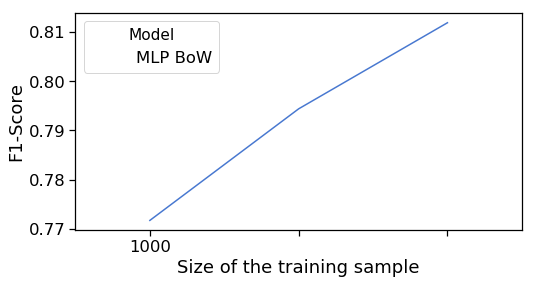

In [98]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

names = [model['name'] for model in models]
#df = pd.DataFrame(results)

df = results

aux = df[df.Model.map(lambda x: x in names)]

sorterIndex = dict(zip(names, range(len(names))))
aux['models_sort'] = aux['Model'].map(sorterIndex)
aux.sort_values(['Model'], \
        ascending = [1], inplace = True)
aux.drop('models_sort', 1, inplace = True)


col_list = ["black", "black", "black", "black", "black"]
col_list_palette = sns.xkcd_palette(col_list)
#sns.set_palette(col_list_palette)
sns.set_palette(sns.color_palette("muted", 5))


#df = df.drop('accuracy', 1).drop('precision', 1).drop('recall', 1).drop('train_size', 1)

plt.figure(figsize=(8, 4))

fig = sns.pointplot(x='train_size', y='f1', hue='Model', 
                    data=df[df.Model.map(lambda x: x in names)],
                    #markers=['o',7,'p','s','x'],
                    markers=['','','','',''],
                    lineheight=1
                   )

for ind, label in enumerate(fig.get_xticklabels()):
    if ind == 0 or ind == 12 or ind == 26 or ind == 39 or ind == 52:
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.setp(fig.lines,linewidth=1.5)
sns.set_context("notebook", font_scale=1.5)
fig.set(ylabel="f1")
fig.set(xlabel="Size of the training sample")
fig.set(ylabel="F1-Score")

In [99]:
results[['Model', 'f1', 'train_size']]

,Model,f1,train_size
0,MLP BoW,0.771713,1000
1,MLP BoW,0.794390,2000
2,MLP BoW,0.811885,3000


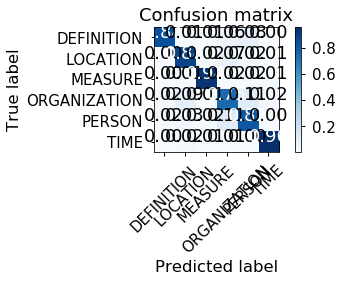

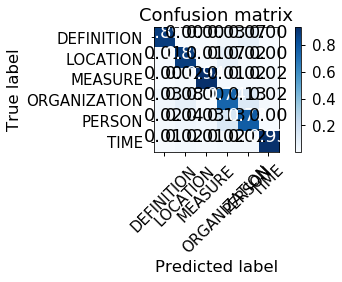

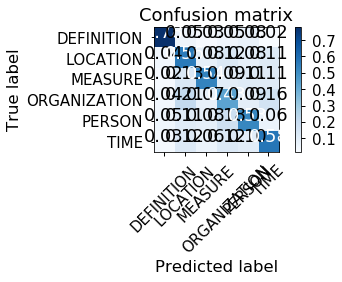

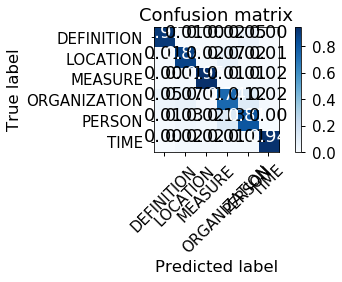

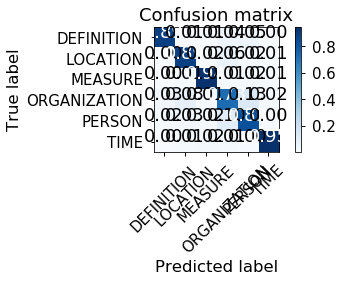

In [98]:
aux = df[df['train_size'] == max(df['train_size'])]
for m_ in aux[['Model', 'confusion']].values:
    plot_confusion_matrix(m_[1], classes=models[0]['model'].classes_)

In [94]:
t_ = df[df['train_size'] == max(df['train_size'])]['confusion'].values[0]

In [79]:
t_

array([[117.2,   1.8,   1.2,   7.8,  11. ,   0.2],
       [  0.4,  92.6,   1.8,   7.2,   2.4,   0.6],
       [  0.2,   1. ,  84.6,   1.6,   1.4,   1.2],
       [  1. ,   5. ,   0.4,  42.2,   6.2,   1.4],
       [  2.2,   3.8,   2.2,  12.4,  92.6,   0.2],
       [  0.2,   1.2,   0.6,   0.6,   0.2,  66.4]])

In [ ]:
plot_confusion_matrix(df)

In [97]:
def plot_confusion_matrix(cm, classes, normalize=True,
                          title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    import itertools
    import numpy as np

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [18]:
df.to_csv('qc_svm_results.csv')

In [51]:
plt.savefig('qc_nbbl.eps', format='eps', dpi=100)

## UIUC PT

In [1]:
import datasets_manager as DM


uiuc_pt_train, uiuc_pt_test = DM.uiuc_pt_questions()

In [8]:
classes = {}
for q in uiuc_pt_train:
    if q['sub_class'] not in classes:
        classes[q['sub_class']] = 0
    classes[q['sub_class']] += 1
print(classes)
c = 0
for q in classes:
    c += classes[q]
print(c)

{'manner': 277, 'cremat': 207, 'animal': 112, 'exp': 69, 'ind': 964, 'gr': 189, 'title': 25, 'def': 421, 'date': 218, 'reason': 191, 'event': 56, 'state': 66, 'desc': 322, 'count': 363, 'other': 733, 'letter': 9, 'religion': 4, 'food': 102, 'country': 155, 'color': 39, 'termeq': 93, 'city': 129, 'body': 16, 'dismed': 104, 'mount': 21, 'money': 72, 'product': 43, 'period': 75, 'substance': 42, 'sport': 62, 'plant': 13, 'techmeth': 38, 'volsize': 14, 'instru': 10, 'abb': 16, 'speed': 9, 'word': 26, 'lang': 16, 'perc': 27, 'code': 9, 'temp': 8, 'symbol': 11, 'ord': 6, 'dist': 33, 'veh': 27, 'weight': 11, 'currency': 4}
5457


In [4]:
classes = {}
for q in uiuc_pt_test:
    if q['class'] not in classes:
        classes[q['class']] = 0
    classes[q['class']] += 1
print(classes)
c = 0
for q in classes:
    c += classes[q]
print(c)

{'NUM': 113, 'LOC': 81, 'HUM': 65, 'DESC': 138, 'ENTY': 94, 'ABBR': 9}
500


#### X and y

In [ ]:
uiuc_pt_train_X, uiuc_pt_train_y = separete_questions(uiuc_pt_train)
uiuc_pt_test_X, uiuc_pt_test_y = separete_questions(uiuc_pt_test)

### Models

In [ ]:
models = [
    {'name': 'SVM BoW', 'model': svm_bow_model()},
    {'name': 'SVM TF-IDF', 'model': svm_tfidf_model()},
    {'name': 'SVM W2V', 'model': svm_w2v_model(pt_model_w2v)},
    {'name': 'SVM Hybrid', 'model': svm_hybrid_model(pt_model_w2v)},
]

### Train and Test

In [ ]:
%%time
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

X_train = np.array(uiuc_pt_train_X)
y_train = np.array(uiuc_pt_train_y)
X_test = np.array(uiuc_pt_test_X)
y_test = np.array(uiuc_pt_test_y)
n = 40  # Training size interval
k = 5
minimum_test = 800

size_train = 0
results = []

while (size_train + n) <= (len(X_train) - minimum_test):
    size_train += n
    size_test = len(X_train) - size_train
    print ('\nTrain:', size_train, 'Test:', size_test, end=': ')
    rs = ShuffleSplit(n_splits=k, train_size=size_train, test_size=size_test, random_state=0)
    for model in models:
        print(' ', model['name'], end=' ')
        accuracy = []
        precision = []
        recall = []
        f1 = []
        confusion = []
        for train_indexs, test_indexs in rs.split(X_train):
            print('.', end='')
            x_train_ = X_train[train_indexs]
            y_train_ = y_train[train_indexs]
            
            model_ = model['model'].fit(x_train_, y_train_)
            result = model_.predict(X_test)
            score = {}
            accuracy.append(accuracy_score(result, y_test))
            precision.append(precision_score(result, y_test, average="macro"))
            recall.append(recall_score(result, y_test, average="macro"))
            f1.append(f1_score(result, y_test, average="macro"))
            confusion.append(confusion_matrix(result, y_test))
        
        results.append({'Model': model['name'], 
                      'accuracy': np.mean(accuracy),
                      'precision': np.mean(precision),
                      'recall': np.mean(recall),
                      'f1': np.mean(f1),
                      'confusion': np.mean(confusion, axis=0),
                      'train_size': size_train})
print('')

### Show Results

In [ ]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

names = [model['name'] for model in models]
df = pd.DataFrame(results)

aux = df[df.Model.map(lambda x: x in names)]

sorterIndex = dict(zip(names, range(len(names))))
aux['models_sort'] = aux['Model'].map(sorterIndex)
aux.sort_values(['Model'], \
        ascending = [1], inplace = True)
aux.drop('models_sort', 1, inplace = True)


col_list = ["black", "black", "black", "black", "black"]
col_list_palette = sns.xkcd_palette(col_list)
#sns.set_palette(col_list_palette)
sns.set_palette(sns.color_palette("muted", 4))


#df = df.drop('accuracy', 1).drop('precision', 1).drop('recall', 1).drop('train_size', 1)

plt.figure(figsize=(8, 4))

fig = sns.pointplot(x='train_size', y='f1', hue='Model', 
                    data=df[df.Model.map(lambda x: x in names)],
                    #markers=['o',7,'p','s','x'],
                    markers=['','','','',''],
                    lineheight=1
                   )

total_ = len(uiuc_pt_train_X)
s0 = 40
s1 = int(1*(total_/4))
s2 = int(2*(total_/4))
s3 = int(3*(total_/4))
s4 = total_

for ind, label in enumerate(fig.get_xticklabels()):
    if ind == s0 or ind == s1 or ind == s2 or ind == s3 or ind == s4:
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.setp(fig.lines,linewidth=1.5)
sns.set_context("notebook", font_scale=1.5)
fig.set(ylabel="f1")
fig.set(xlabel="Size of the training sample")
fig.set(ylabel="F1-Score")

## UIUC

In [ ]:
import datasets_manager as DM


uiuc_train, uiuc_test = DM.uiuc_questions()

In [ ]:
def make_query(questions, stop_words):
    ret = []
    for question in questions:
        text = question['question']
        text = text.lower()
        text = nltk.word_tokenize(text)
        key_words = []
        for token in text:
            if token not in stop_words:
                key_words.append(token)
        question['query'] = ' '.join(key_words)
        ret.append(question)
    return ret

## Teste estatístico

In [ ]:
import scipy

a = []
b = []

for t in table:
    if t['Model'] == lbs[1]:
        a.append(t['f1'])
    if t['Model'] == lbs[3]:
        b.append(t['f1'])

scipy.stats.ttest_ind(a, b)